There is a huge demand for used cars in the Indian Market today. 
As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years 
and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.
In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. 
There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. 
In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price 
and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts
which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty 
in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in 
the market.

As a senior data scientist at Cars4U, I would like to come up with a pricing model that can effectively predict the price of 
used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business 
knows the market price, it will never sell anything below it. The objective of these models is to explore and visualize the 
dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and 
recommendations that will help the business.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("used_cars_data.csv")
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
df.sample(n=10)

There are 7253 rows and 14 columns.


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,35.29,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,8.23,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,67.10,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,10.25,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36,8.20


In [3]:
data1=df.copy()

In [4]:
df.info()  # down to 82 columns after the initial 88

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


In [5]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
dtype: int64

In [6]:
def milea_to_num(milea):
    """This function takes in a string representing a salary in mileage units
    and converts it to a number. For example, '220km/kg = 220kmpl' .
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(milea, str):  # checks if `milea` is a string
        multiplier = 1  
        if milea.endswith('km/kg'):
            multiplier = 1
        elif milea.endswith('kmpl'):
            multiplier = 1
        return float(milea.replace('km/kg', '').replace('kmpl', '')) * multiplier
    else:  # this happens when the current milea is np.nan
        return np.nan



In [7]:
def engine_to_num(engine):
    """In the engine column, I'm replacing the terminal 'CC' with
    the empty string and converting to a float. Non-strings are 
    np.nans and are kept as np.nans."""
    if isinstance(engine, str):
        return float(engine.replace('CC', ''))
    else:
        return np.nan

In [8]:
def power_to_num(power):
    """In the power column, I'm replacing the terminal 'bhp' with
    the empty string and converting to a float. Non-strings are 
    np.nans and are kept as np.nans."""
    if isinstance(power, str):
        return float(power.replace('bhp', ''))
    else:
        return np.nan

In [9]:
col_transforms = {
    'Mileage': milea_to_num,
    'Engine': engine_to_num,
    'Power': power_to_num
}

In [10]:
for k,v in col_transforms.items():
    df[k] = df[k].map(v)

In [11]:
df.head(20)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,10.25,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,9.47,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,21.00,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,13.23,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,7.63,1.95


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [13]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
dtype: int64

In [14]:
df.isnull().sum().sort_values(ascending=False)

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
dtype: int64

In [15]:
df[df.Price.isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6019,6019,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,4.360,NaN
6020,6020,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,4.360,NaN
6021,6021,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,25.270,NaN
6022,6022,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,8.525,NaN
6023,6023,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,10.250,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,13.230,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,10.150,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,9.470,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,10.150,NaN


                        #Since Price is a major output parameter, let's remove the Nan values from the dataset completely

In [16]:
df.dropna(subset=["Price"], inplace=True)

# let us reset the dataframe index
df.reset_index(inplace=True, drop=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   float64
 9   Engine             5983 non-null   float64
 10  Power              5876 non-null   float64
 11  Seats              5977 non-null   float64
 12  New_Price          6019 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 658.5+ KB


In [18]:
df.isnull().sum().sort_values(ascending=False)

Power                143
Seats                 42
Engine                36
Mileage                2
S.No.                  0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
New_Price              0
Price                  0
dtype: int64

In [19]:
df[df.Mileage.isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,24.01,12.75


In [20]:
df[df.Engine.isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,13.580,2.95
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,7.880,2.11
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,7.880,1.75
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,120.000,26.50
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,13.580,3.20
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,7.880,5.80
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,13.580,1.50
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,120.000,40.88
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,NaN,7.880,3.15
2096,2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.00,NaN,NaN,NaN,4.550,1.93


In [21]:
df[df.Seats.isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,13.580,2.95
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,7.880,2.11
229,229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,NaN,7.650,3.60
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,7.880,1.75
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,120.000,26.50
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,13.580,3.20
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,7.880,5.80
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,13.580,1.50
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,120.000,40.88
1917,1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,NaN,13.580,1.70


In [22]:
df[df.Power.isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,NaN,5.0,11.685,2.00
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,NaN,5.0,4.550,1.30
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5.0,4.550,2.10
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,4.550,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,4.550,1.67
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,13.580,2.95
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,7.880,2.11
227,227,Maruti Swift VDI BSIV,Delhi,2013,47000,Diesel,Manual,First,17.80,1248.0,NaN,5.0,7.880,4.10
245,245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,4.550,0.95
262,262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,0.00,1086.0,NaN,5.0,4.550,1.75


In [23]:
df.dropna(subset=["Power"], inplace=True)

# let us reset the dataframe index
df.reset_index(inplace=True, drop=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5876 entries, 0 to 5875
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              5876 non-null   int64  
 1   Name               5876 non-null   object 
 2   Location           5876 non-null   object 
 3   Year               5876 non-null   int64  
 4   Kilometers_Driven  5876 non-null   int64  
 5   Fuel_Type          5876 non-null   object 
 6   Transmission       5876 non-null   object 
 7   Owner_Type         5876 non-null   object 
 8   Mileage            5874 non-null   float64
 9   Engine             5876 non-null   float64
 10  Power              5876 non-null   float64
 11  Seats              5874 non-null   float64
 12  New_Price          5876 non-null   float64
 13  Price              5876 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 642.8+ KB


In [25]:
df.isnull().sum().sort_values(ascending=False)

Mileage              2
Seats                2
S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Engine               0
Power                0
New_Price            0
Price                0
dtype: int64

In [26]:
df[df.Mileage.isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4336,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00
4783,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,24.01,12.75


#Removing seats and Mileage would remove four more rows

In [27]:
df.dropna(subset=["Mileage", "Seats"], inplace=True)

# let us reset the dataframe index
df.reset_index(inplace=True, drop=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              5872 non-null   int64  
 1   Name               5872 non-null   object 
 2   Location           5872 non-null   object 
 3   Year               5872 non-null   int64  
 4   Kilometers_Driven  5872 non-null   int64  
 5   Fuel_Type          5872 non-null   object 
 6   Transmission       5872 non-null   object 
 7   Owner_Type         5872 non-null   object 
 8   Mileage            5872 non-null   float64
 9   Engine             5872 non-null   float64
 10  Power              5872 non-null   float64
 11  Seats              5872 non-null   float64
 12  New_Price          5872 non-null   float64
 13  Price              5872 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 642.4+ KB


In [29]:
df.isnull().sum().sort_values(ascending=False)

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [30]:
new_df=df.copy()

In [31]:
new_df.head(20)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,10.25,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,9.47,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,21.00,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,13.23,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,7.63,1.95


In [32]:
new_df.isnull().sum().sort_values(ascending=False)

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [33]:
new_df.shape

(5872, 14)

In [34]:
new_df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [35]:
new_df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74


In [36]:
new_df.columns.duplicated() #Let's check for duplicated columns

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

# Univariate Data Analysis

In [37]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [38]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,5872.0,3013.288147,1737.351187,0.00,1509.7500,3015.50,4516.2500,6018.00
Year,5872.0,2013.477691,3.164568,1998.00,2012.0000,2014.00,2016.0000,2019.00
Kilometers_Driven,5872.0,58316.999149,92169.410006,171.00,33422.5000,52609.00,72402.7500,6500000.00
Mileage,5872.0,18.277839,4.365657,0.00,15.2600,18.20,21.1000,33.54
Engine,5872.0,1625.745572,601.641783,624.00,1198.0000,1495.50,1991.0000,5998.00
Power,5872.0,113.276894,53.881892,34.20,75.0000,97.70,138.1000,560.00
Seats,5872.0,5.283719,0.805081,2.00,5.0000,5.00,5.0000,10.00
New_Price,5872.0,21.635792,24.278063,3.91,7.9600,11.30,23.1525,375.00
Price,5872.0,9.603919,11.249453,0.44,3.5175,5.75,10.0000,160.00


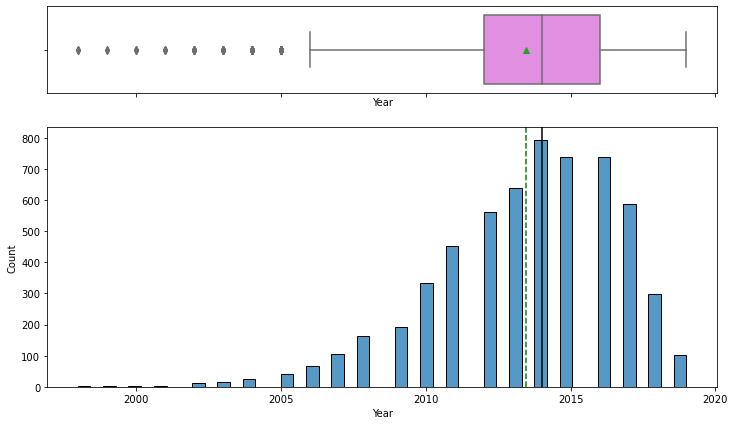

In [39]:
histogram_boxplot(new_df, "Year")

Year is left-skewed

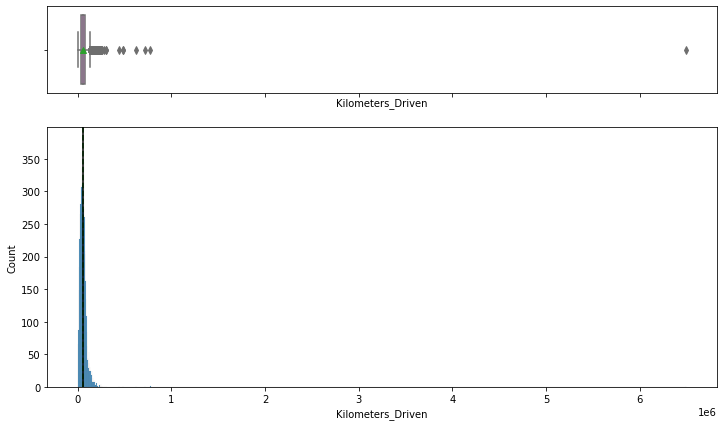

In [40]:
histogram_boxplot(new_df, "Kilometers_Driven")

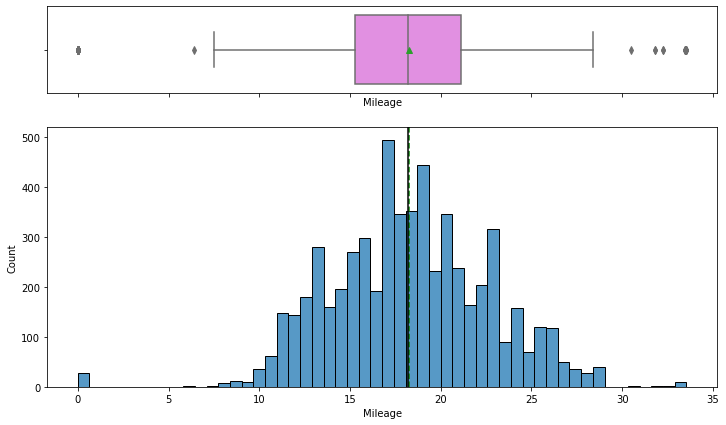

In [41]:
histogram_boxplot(new_df, "Mileage")

Mileage is quite normally distributed

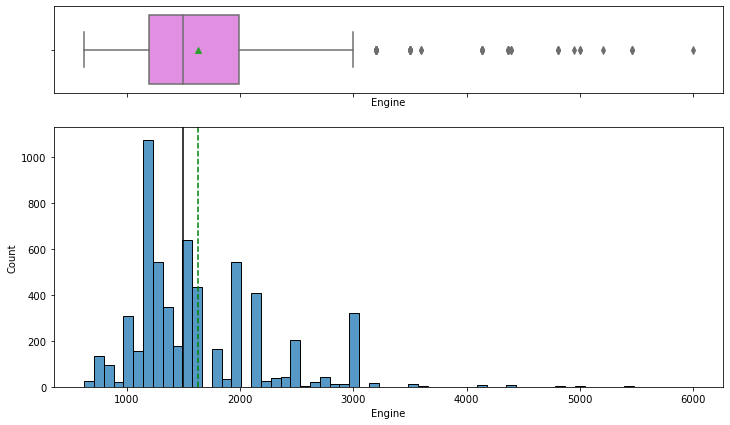

In [42]:
histogram_boxplot(new_df, "Engine")

Engine is right-skewed

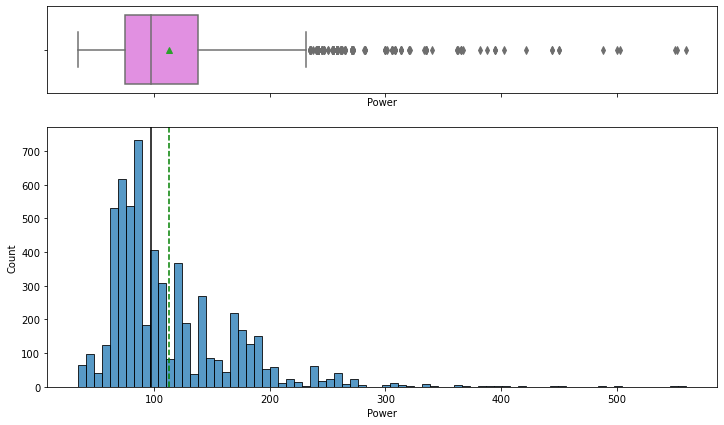

In [43]:
histogram_boxplot(new_df, "Power")

Power is right-skewed

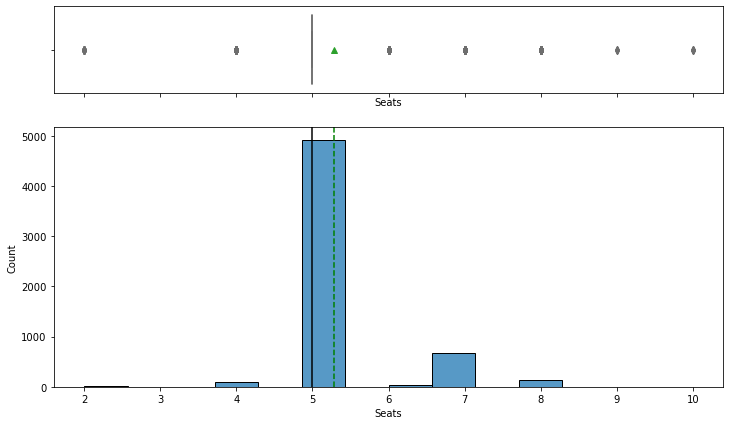

In [44]:
histogram_boxplot(new_df, "Seats")

Seats is right skewed

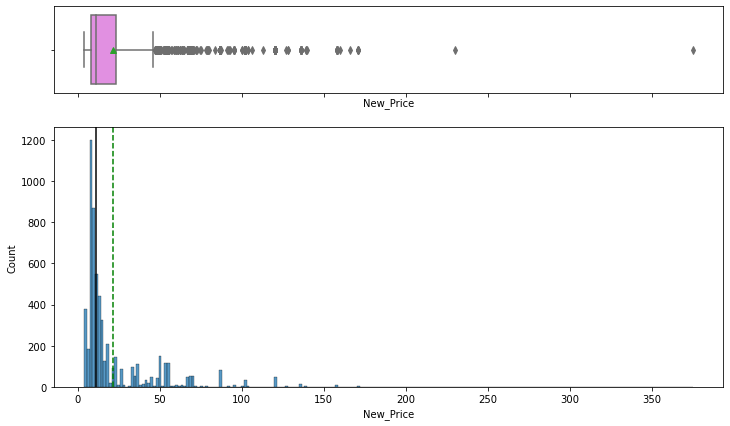

In [45]:
histogram_boxplot(new_df, "New_Price")

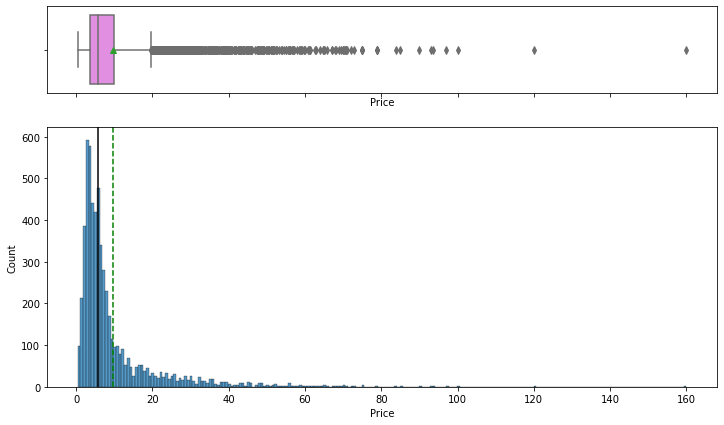

In [46]:
histogram_boxplot(new_df, "Price")

New_Price and Price are right skewed

In [47]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [48]:
new_df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

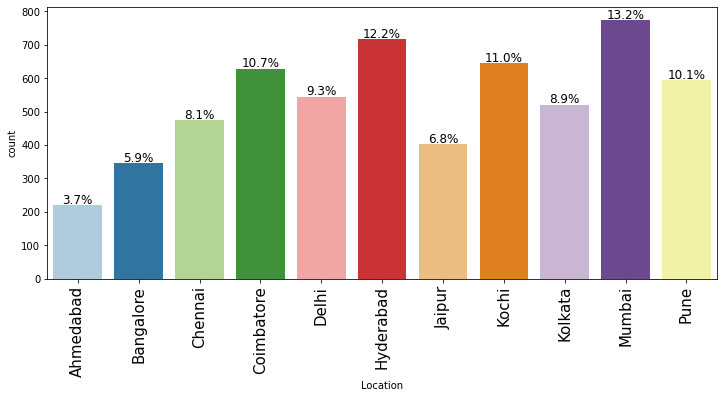

In [49]:
labeled_barplot(new_df, "Location", perc=True)

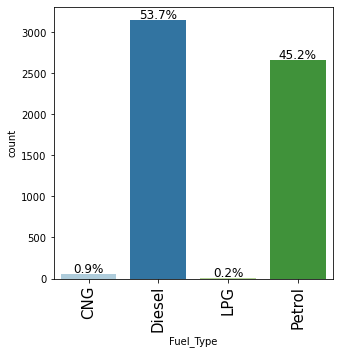

In [50]:
labeled_barplot(new_df, "Fuel_Type", perc=True)

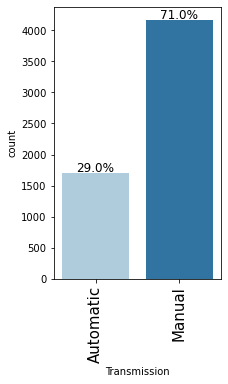

In [51]:
labeled_barplot(new_df, "Transmission", perc=True)

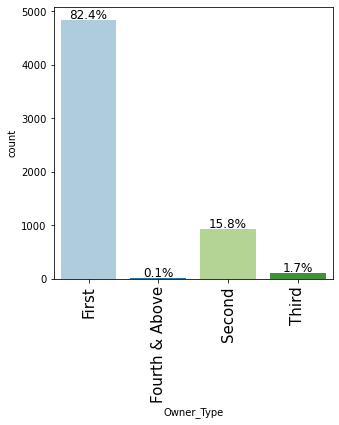

In [52]:
labeled_barplot(new_df, "Owner_Type", perc=True)

# Bivariate Analysis

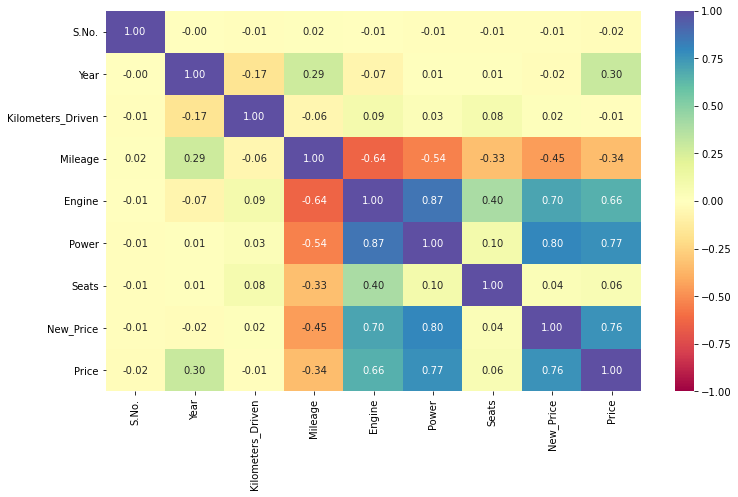

In [53]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    new_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Location: Location in which the car is being sold or is available for purchase (cities)
Year: Manufacturing year of the car
Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
Transmission: The type of transmission used by the car (Automatic/Manual)
Owner: Type of ownership
Mileage: The standard mileage offered by the car company in kmpl or km/kg
Engine: The displacement volume of the engine in CC
Power: The maximum power of the engine in bhp
Seats: The number of seats in the car
New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
Price: The price of the used car in INR Lakhs

Fairly negative relationship between Engine and Mileage
Mileage, engine, power have quite significant relationship with Price and New_Price.

# Let's check the variation in Price and New_Price with some of the categorical columns in our data

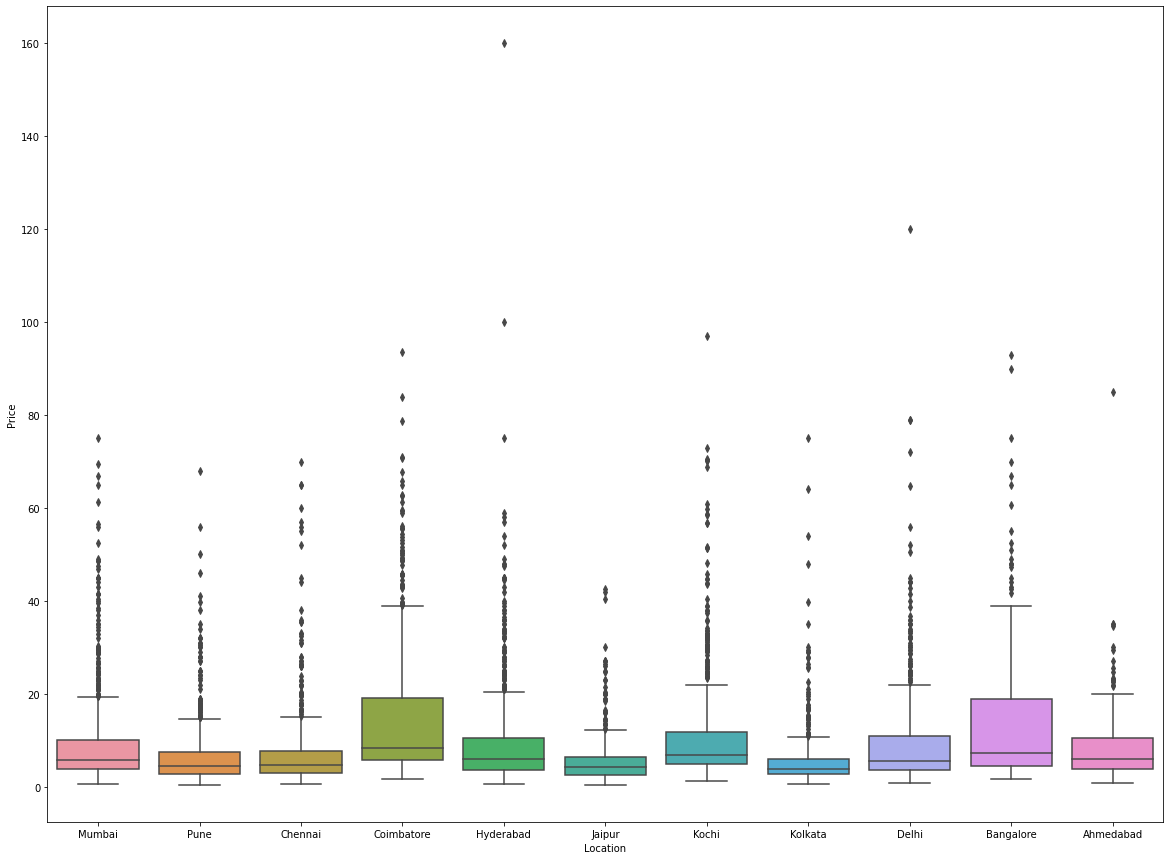

In [54]:
plt.figure(figsize=(20, 15))
sns.boxplot(x="Location", y="Price", data=new_df)
plt.show()

Price have more or less similar distribution across all the Location, but appears more skewed for locations in Bangalore and Coimbatore

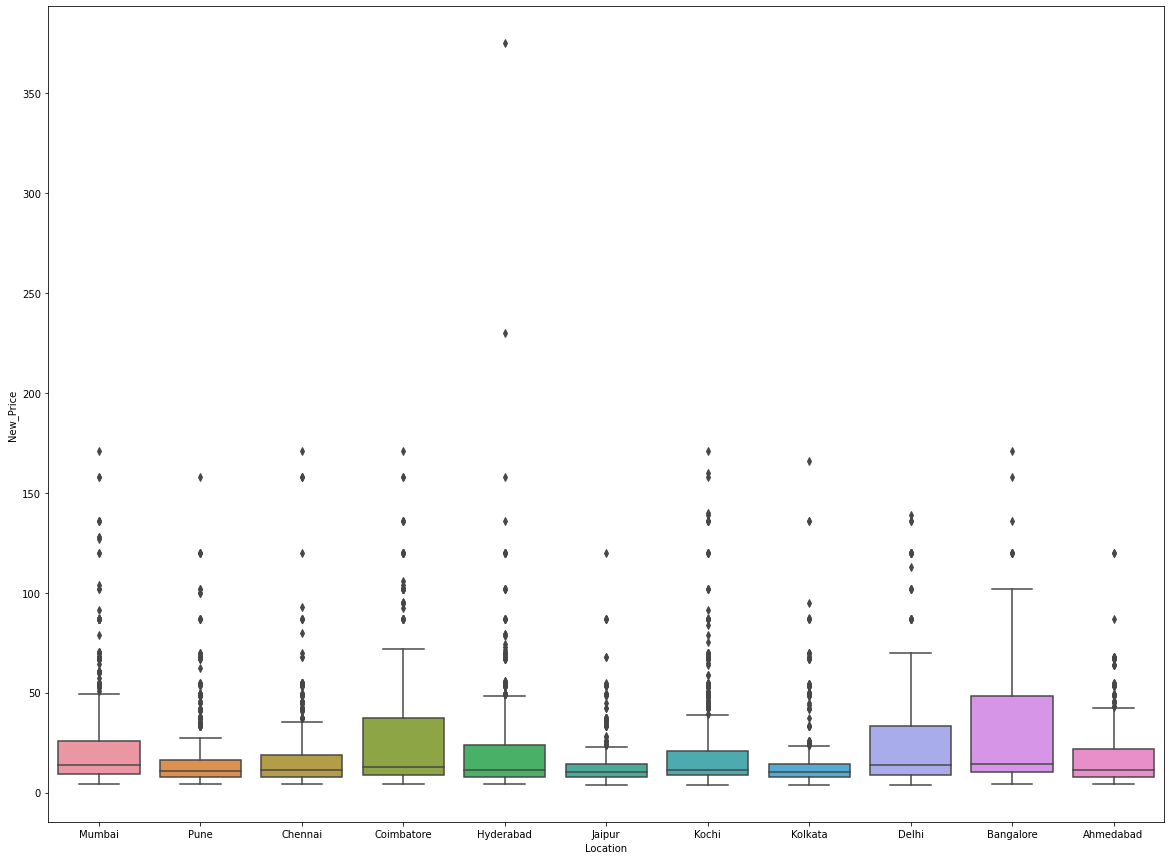

In [55]:
plt.figure(figsize=(20, 15))
sns.boxplot(x="Location", y="New_Price", data=new_df)
plt.show()

New_Price have more or less similar distribution across all the Location, but appears more skewed for locations in Bangalore and Coimbatore

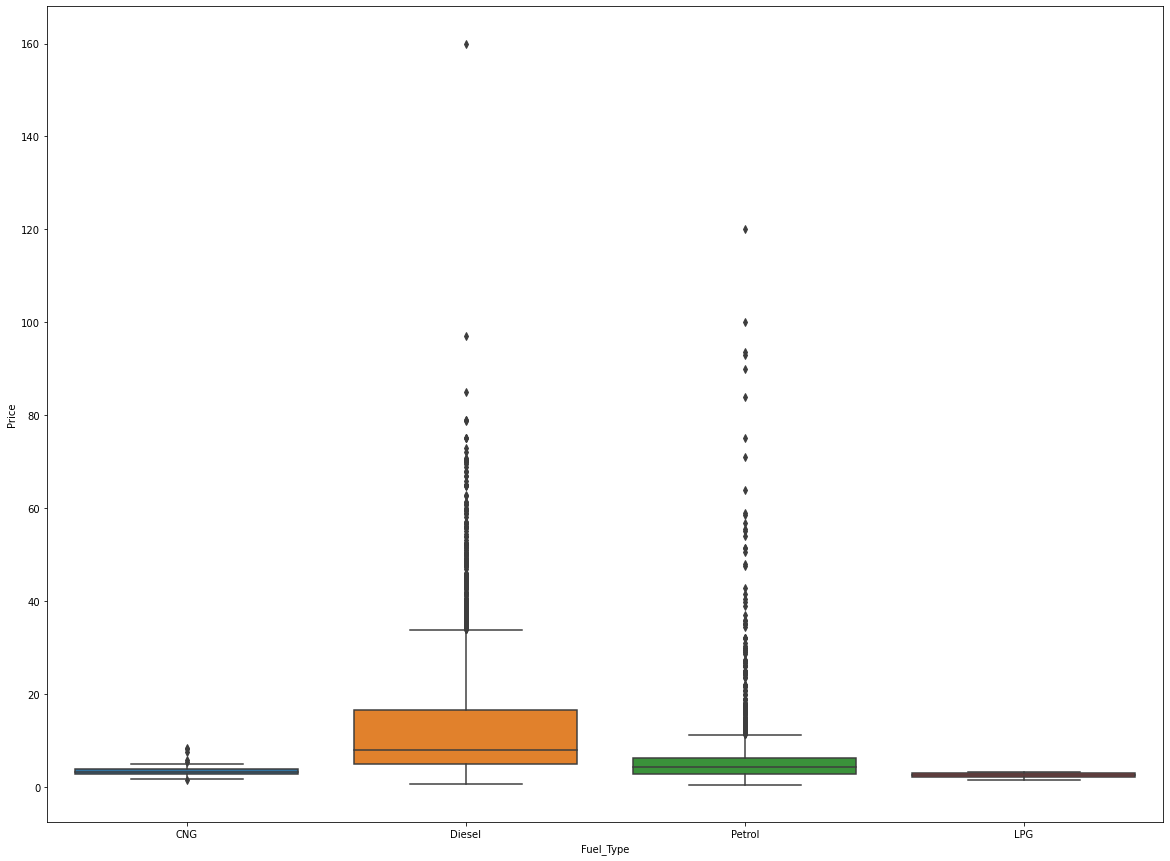

In [56]:
plt.figure(figsize=(20, 15))
sns.boxplot(x="Fuel_Type", y="Price", data=new_df)
plt.show()

In general, Price is higher for cars that run on Diesel and least for cars that run on LPG Fuel_Type

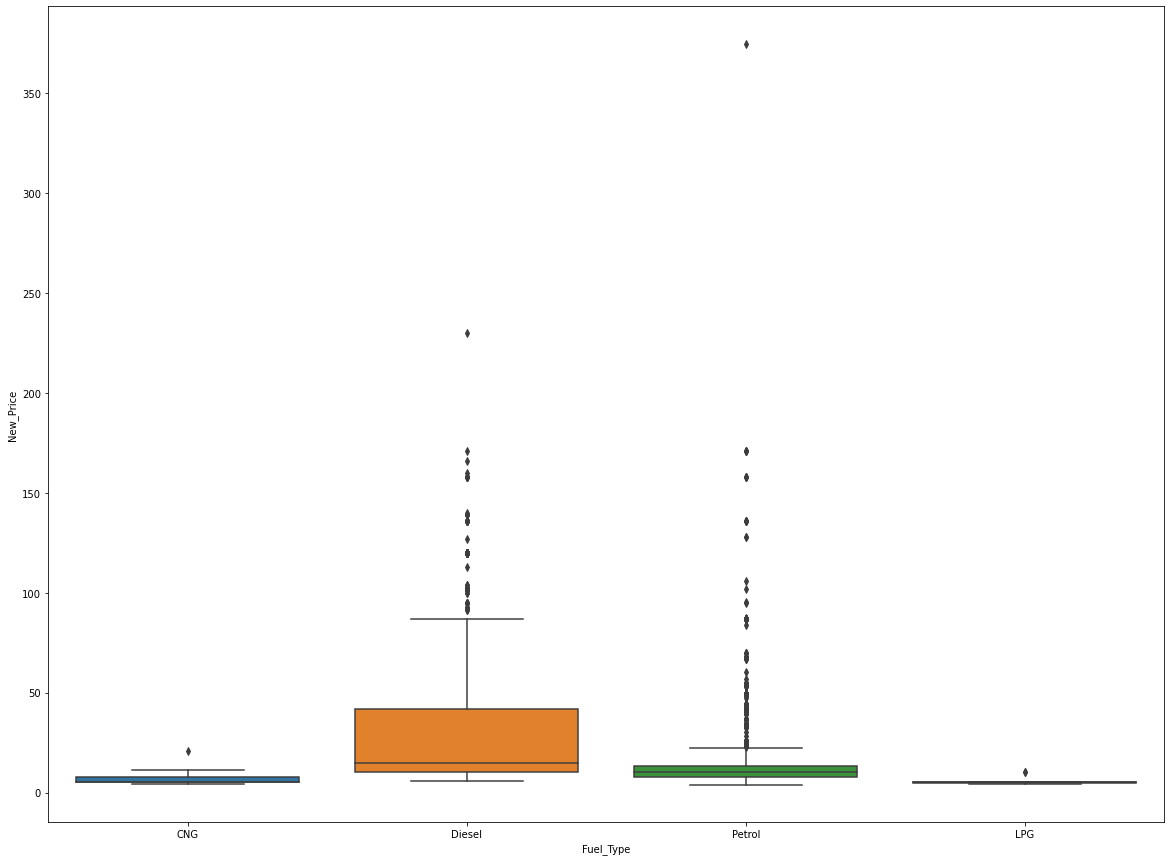

In [57]:
plt.figure(figsize=(20, 15))
sns.boxplot(x="Fuel_Type", y="New_Price", data=new_df)
plt.show()

In general, New_Price is higher for cars that run on Diesel and least for cars that run on LPG Fuel_Type

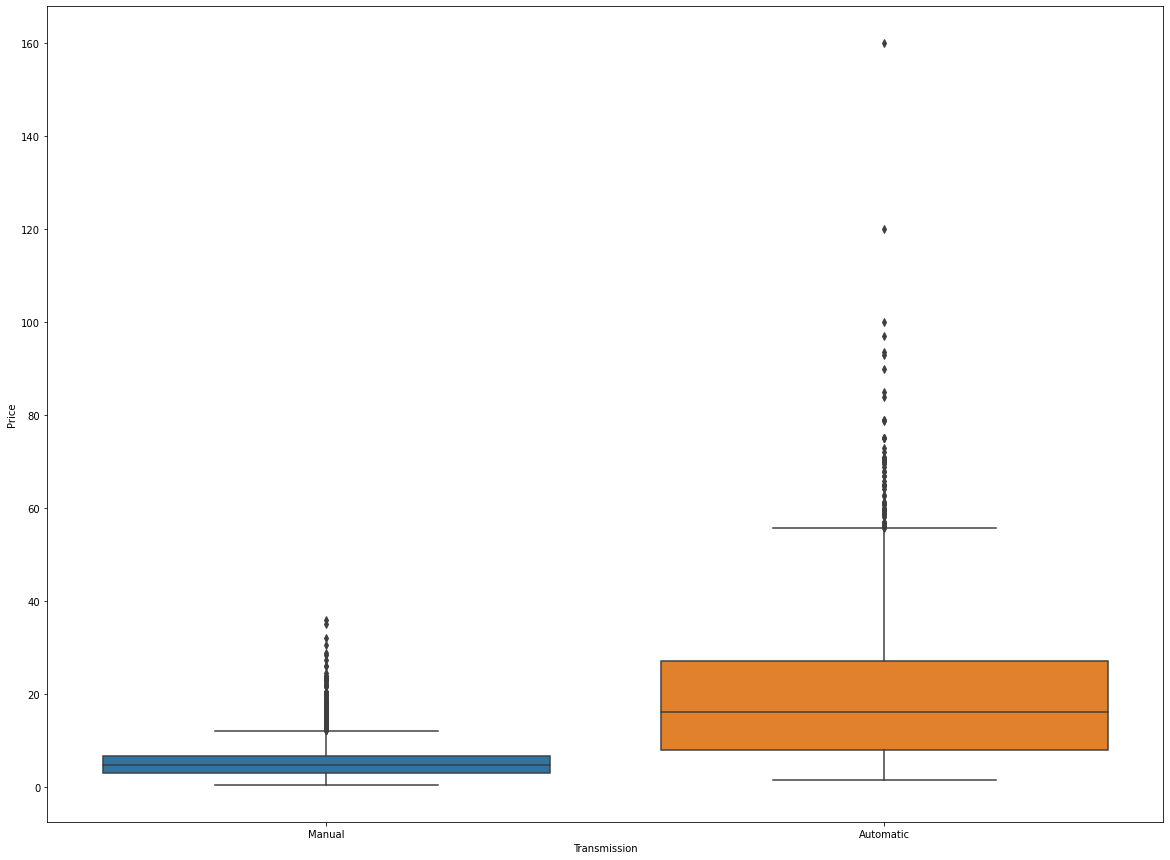

In [58]:
plt.figure(figsize=(20, 15))
sns.boxplot(x="Transmission", y="Price", data=new_df)
plt.show()

In general, Price is low for cars with manual transmission

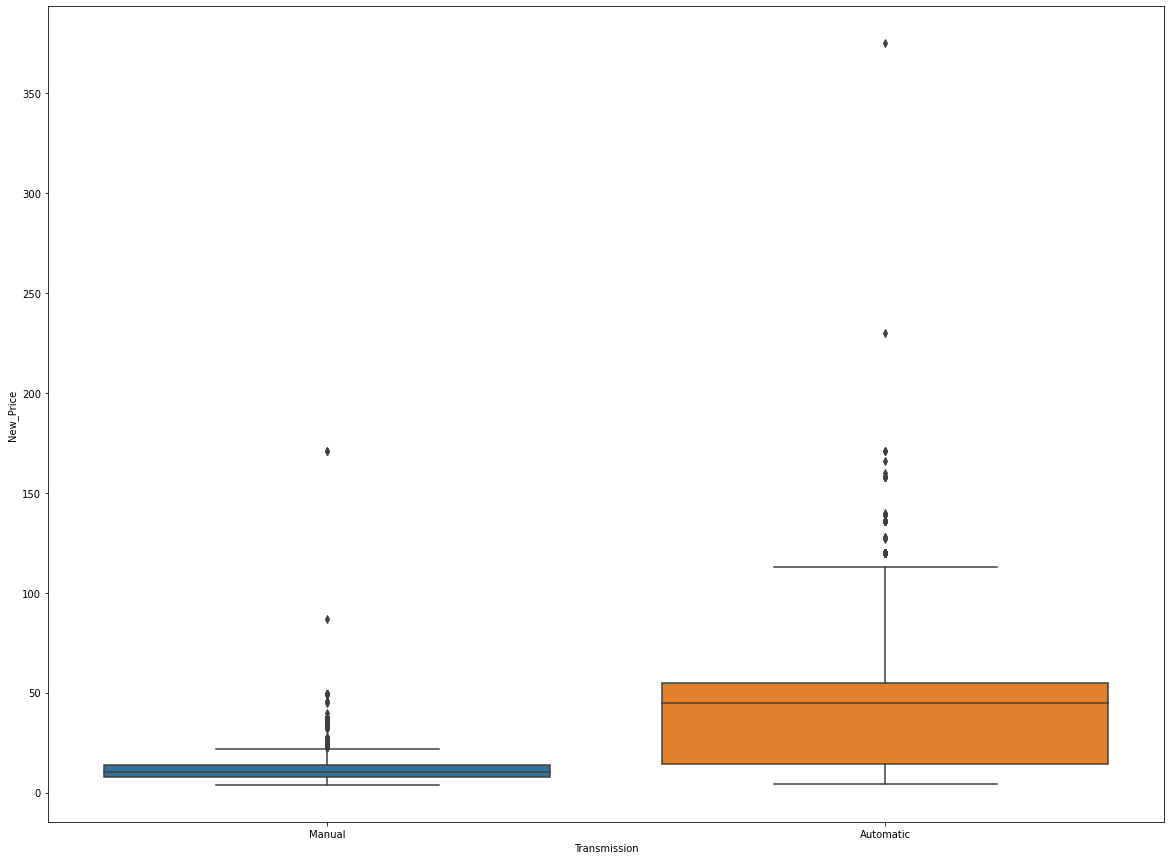

In [59]:
plt.figure(figsize=(20, 15))
sns.boxplot(x="Transmission", y="New_Price", data=new_df)
plt.show()

In general, New_Price is low for cars with manual transmission

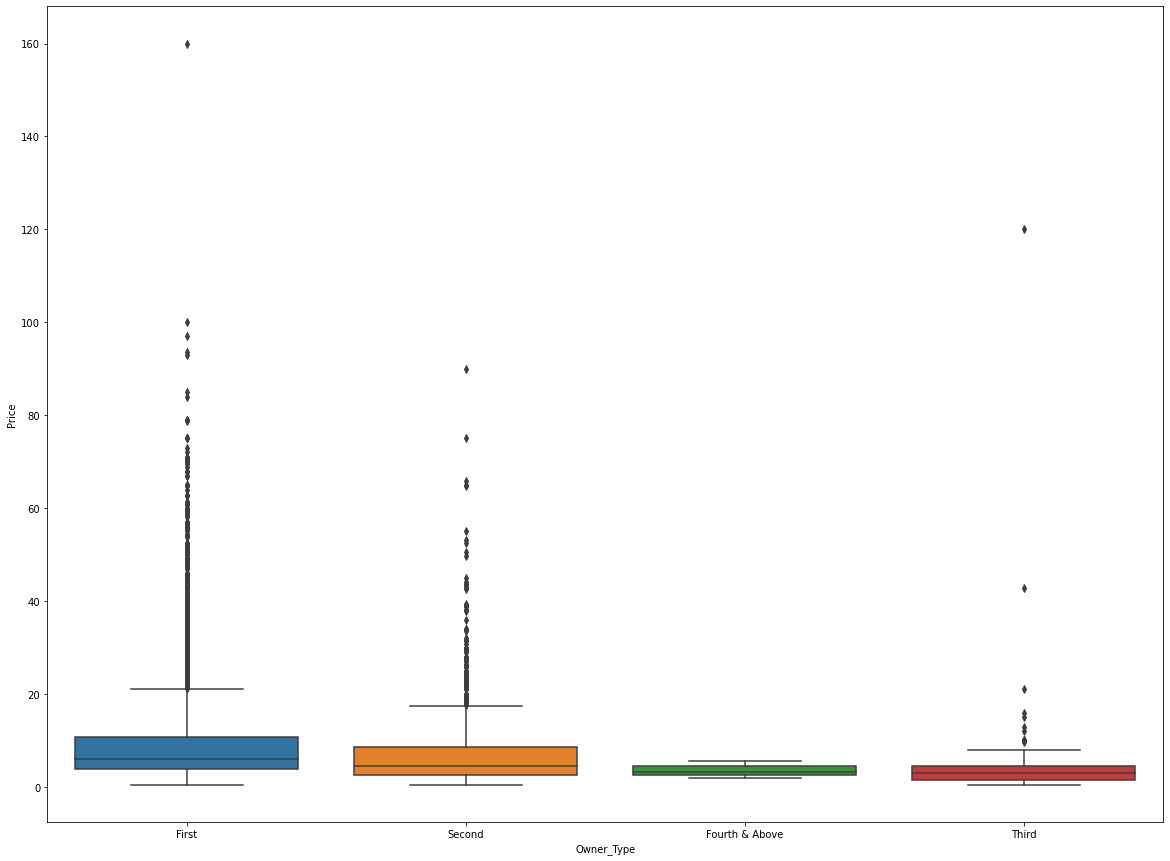

In [60]:
plt.figure(figsize=(20, 15))
sns.boxplot(x="Owner_Type", y="Price", data=new_df)
plt.show()

In general, Price is low for Owner_Type Third and Fourth & Above

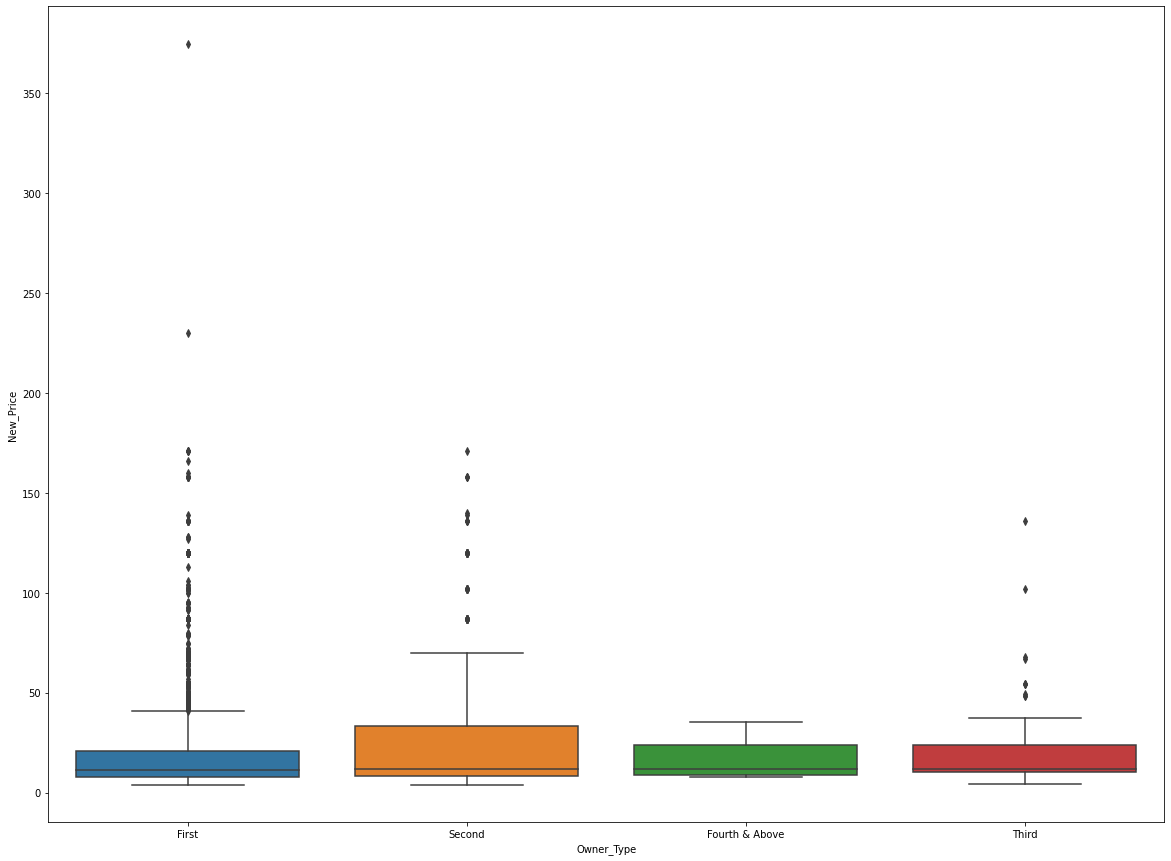

In [61]:
plt.figure(figsize=(20, 15))
sns.boxplot(x="Owner_Type", y="New_Price", data=new_df)
plt.show()

New_Price have more or less similar distribution across all the Types of Ownership

In [62]:
data2=new_df.copy()

In [63]:
data2.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74


# Define Dependent Variable

In [64]:
X = data2.drop(["S.No.","Name","New_Price","Price"], axis=1) #Drop Name as the names are very many and can be ambiguous, as S.No
y1 = data2["New_Price"]
y2 = data2["Price"]

Creating dummy variables

In [65]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=False,
)

X.sample(n=20)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
2990,2015,66510,21.10,814.0,55.20,5.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0
1385,2017,16000,17.01,1499.0,110.40,5.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0
2988,2009,70000,14.53,1798.0,138.10,5.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1
3253,2017,57000,26.59,1248.0,74.00,5.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0
1726,2013,53996,22.90,1248.0,74.00,5.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
2834,2012,52100,21.43,1364.0,86.79,5.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4346,2015,50000,23.10,998.0,67.04,5.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0
139,2012,91235,11.50,2982.0,171.00,7.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
3567,2015,55000,22.70,1498.0,89.84,5.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0
1297,2011,55000,16.46,2993.0,258.00,5.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0


In [66]:
X1=X.copy()

In [67]:
X2=X.copy()

Split the data into train and test for "New_Price"

In [68]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

In [69]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])
print("Number of columns in train data =", x_train.shape[1])
print("Number of columns in test data =", x_test.shape[1])

Number of rows in train data = 4110
Number of rows in test data = 1762
Number of columns in train data = 27
Number of columns in test data = 27


Fitting a linear model

In [70]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

Let us check the coefficients and intercept of the model, which are the parameters we learned.

In [71]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,-0.347629
Kilometers_Driven,-0.000004
Mileage,-0.513426
Engine,0.000302
Power,0.280071
Seats,-2.477213
Location_Ahmedabad,-0.944920
Location_Bangalore,-0.336815
Location_Chennai,-1.369653
Location_Coimbatore,1.804906


# Coefficient Interpretations for linear model predicting New_Price


Coefficients of Year, Kilometers_Driven, Engine, Power, , etc. are positive.
Increase in these will lead to an increase in the Price of a car.
Coefficients of Mileage, Seats, etc. are negative.
Increase in these will lead to a decrease in the Price of a car.

# Let's repeat same process of spliting data and linear model for Price

In [72]:
from sklearn.model_selection import train_test_split

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.3, random_state=1)

In [73]:
print("Number of rows in train data =", x_train_2.shape[0])
print("Number of rows in test data =", x_test_2.shape[0])
print("Number of columns in train data =", x_train_2.shape[1])
print("Number of columns in test data =", x_test_2.shape[1])

Number of rows in train data = 4110
Number of rows in test data = 1762
Number of columns in train data = 27
Number of columns in test data = 27


In [74]:
lin_reg_model_2 = LinearRegression()
lin_reg_model_2.fit(x_train_2, y_train_2)

LinearRegression()

In [75]:
coef_df_2 = pd.DataFrame(
    np.append(lin_reg_model_2.coef_, lin_reg_model_2.intercept_),
    index=x_train_2.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df_2

,Coefficients
Year,1.019374
Kilometers_Driven,0.000001
Mileage,-0.185962
Engine,0.000206
Power,0.131950
Seats,-0.942561
Location_Ahmedabad,-0.532236
Location_Bangalore,1.232355
Location_Chennai,0.414329
Location_Coimbatore,1.587035


# Coefficient Interpretations for linear model predicting New_Price


Coefficients of Year, Kilometers_Driven, Engine, Power, etc. are positive. 
Increase in these will lead to an increase in the Price of a car. 
Coefficients of Mileage, Seats, etc. are negative. 
Increase in these will lead to a decrease in the Price of a car.

# Model performance check

We will be using metric functions defined in sklearn for RMSE, MAE, and 𝑅2.

We will define functions to calculate adjusted 𝑅2 and MAPE.

The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage. 
MAPE can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. 
It works best if there are no extreme values in the data and none of the actual values are 0.
We will create a function that will print out all the above metrics in one go.


In [76]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [77]:
# Checking model performance on train set - New Price
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,14.170099,7.959269,0.675114,0.672965,48.338049


In [78]:
# Checking model performance on test set -New Price
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,12.657152,7.601427,0.693161,0.688383,48.063864


In [79]:
# Checking model performance on train set - Price
print("Training Performance\n")
lin_reg_model_train_perf_2 = model_performance_regression(lin_reg_model_2, x_train_2, y_train_2)
lin_reg_model_train_perf_2

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.223645,3.744548,0.699581,0.697594,76.254402


In [80]:
# Checking model performance on test set - Price
print("Test Performance\n")
lin_reg_model_test_perf_2 = model_performance_regression(lin_reg_model_2, x_test_2, y_test_2)
lin_reg_model_test_perf_2

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.765641,3.597956,0.725086,0.720806,66.008112


# Observations

The train and test  𝑅2 for New Price Prediction are 0.68 and 0.69, indicating that the model explains 68% and 69% of the total variation in the train and test sets respectively. Also, both scores are comparable.

RMSE values on the train and test sets are also comparable.

This shows that the model is not overfitting.

MAPE of 48.06 on the test data means that we are able to predict within ~48% of the New Price.



The train and test  𝑅2 for Price Prediction are 0.70 and 0.73, indicating that the model explains 70% and 73% of the total variation in the train and test sets respectively. Also, both scores are comparable.

RMSE values on the train and test sets are also comparable.

This shows that the model is not overfitting.

MAPE of 66.01 on the test data means that we are able to predict within ~66% of the Price.


# Conclusions

We have been able to build a predictive model that can be used by Cars4U to predict the Price of a new car and price of used car with an 𝑅2 of 0.693 and 0.725 on the test set, respectively.
We found that Year, Kilometers_Driven, Engine, and Power are some of the factors which tend to increase the price of a car.
We found that Mileage and Seats are some of the factors which tend to decrease the price of a car.


# Recommendations

Cars4U should take the year, kilometers driven, engine and power rating of the car into consideration as they are major
factors that increase the price of the car.

Cars4U should take the mileage and seats of the car into consideration as they are major factors that reduce the price of the 
car.

Cars4U optimal price of used car should be between modelled Price of new car and Price of used car to maximize profit.

In [81]:
data3=data2.copy()

In [82]:
dist_cols = [
    item for item in data3.select_dtypes(include=np.number).columns
]

In [83]:
dist_cols

['S.No.',
 'Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price']

In [84]:
for col in dist_cols:
    data3[col + "_log"] = np.log(data3[col] + 1)

# dropping the original columns
data3.drop(dist_cols, axis=1, inplace=True)
data3.head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,S.No._log,Year_log,Kilometers_Driven_log,Mileage_log,Engine_log,Power_log,Seats_log,New_Price_log,Price_log
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First,0.000000,7.606387,11.184435,3.317816,6.906755,4.080246,1.791759,1.873339,1.011601
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,0.693147,7.608871,10.621352,3.028683,7.367077,4.845761,1.791759,2.836737,2.602690
2,Honda Jazz V,Chennai,Petrol,Manual,First,1.098612,7.606885,10.736418,2.954910,7.090077,4.496471,1.791759,2.262804,1.704748
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,1.386294,7.607381,11.373675,3.080533,7.130099,4.497139,2.079442,2.507157,1.945910
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,1.609438,7.607878,10.613271,2.785011,7.585281,4.954418,1.791759,3.991573,2.930660


In [90]:
X3 = data3.drop(["S.No._log", "Name","New_Price_log","Price_log"], axis=1) #Drop Name as the names are very many and can be ambiguous, as S.No
y3 = data3["New_Price_log"]
y4 = data3["Price_log"]

In [91]:
X3 = pd.get_dummies(
    X3,
    columns=X3.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=False,
)

X3.sample(n=20)

,Year_log,Kilometers_Driven_log,Mileage_log,Engine_log,Power_log,Seats_log,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
2348,7.606885,10.839601,2.544747,7.493874,5.231109,1.791759,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
3161,7.609367,10.288818,3.063391,7.088409,4.416428,1.791759,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0
4986,7.606387,11.410306,2.839078,7.169350,4.490881,1.791759,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0
648,7.608374,10.809748,3.078694,7.225481,4.522875,1.791759,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0
4830,7.606885,11.472114,2.938103,7.242082,3.985273,1.791759,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4153,7.608871,10.165890,2.790551,7.372746,4.806477,1.791759,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0
5819,7.607381,11.082158,2.768832,7.670429,5.323010,1.791759,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
2235,7.610358,10.555683,3.116178,7.288244,4.646792,1.791759,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0
2496,7.608374,10.717280,2.568788,7.687080,4.795791,2.197225,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0
46,7.605392,10.968302,2.766319,7.596894,4.729156,1.791759,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0


# New_Price_Log Linear Modeling

In [92]:
from sklearn.model_selection import train_test_split #For New_Price

x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=1)

In [93]:
print("Number of rows in train data =", x_train3.shape[0])
print("Number of rows in test data =", x_test3.shape[0])
print("Number of columns in train data =", x_train3.shape[1])
print("Number of columns in test data =", x_test3.shape[1])

Number of rows in train data = 4110
Number of rows in test data = 1762
Number of columns in train data = 27
Number of columns in test data = 27


In [94]:
lin_reg_model3 = LinearRegression()
lin_reg_model3.fit(x_train3, y_train3)

LinearRegression()

In [95]:
coef_df3 = pd.DataFrame(
    np.append(lin_reg_model3.coef_, lin_reg_model3.intercept_),
    index=x_train3.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df3

,Coefficients
Year_log,-37.903657
Kilometers_Driven_log,-0.043107
Mileage_log,-0.170744
Engine_log,0.394835
Power_log,0.904983
Seats_log,-0.293387
Location_Ahmedabad,-0.017931
Location_Bangalore,0.000553
Location_Chennai,-0.053498
Location_Coimbatore,0.055059


In [96]:
# Checking model performance on train set - New Price
print("Training Performance\n")
lin_reg_model_train_perf3 = model_performance_regression(lin_reg_model3, x_train3, y_train3)
lin_reg_model_train_perf3

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.339018,0.248864,0.797603,0.796265,9.126357


In [97]:
# Checking model performance on test set -New Price
print("Test Performance\n")
lin_reg_model_test_perf3 = model_performance_regression(lin_reg_model3, x_test3, y_test3)
lin_reg_model_test_perf3

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.33044,0.247164,0.800237,0.797126,9.115285


# Price_log Linear Modeling

In [98]:
from sklearn.model_selection import train_test_split #For New_Price

x_train4, x_test4, y_train4, y_test4 = train_test_split(X3, y4, test_size=0.3, random_state=1)

In [99]:
print("Number of rows in train data =", x_train4.shape[0])
print("Number of rows in test data =", x_test4.shape[0])
print("Number of columns in train data =", x_train4.shape[1])
print("Number of columns in test data =", x_test4.shape[1])

Number of rows in train data = 4110
Number of rows in test data = 1762
Number of columns in train data = 27
Number of columns in test data = 27


In [100]:
lin_reg_model4 = LinearRegression()
lin_reg_model4.fit(x_train4, y_train4)

LinearRegression()

In [101]:
coef_df4 = pd.DataFrame(
    np.append(lin_reg_model4.coef_, lin_reg_model4.intercept_),
    index=x_train4.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df4

,Coefficients
Year_log,167.194968
Kilometers_Driven_log,-0.101264
Mileage_log,-0.124222
Engine_log,0.268670
Power_log,0.899145
Seats_log,-0.133039
Location_Ahmedabad,0.000418
Location_Bangalore,0.123228
Location_Chennai,0.019100
Location_Coimbatore,0.124114


In [102]:
# Checking model performance on train set - Price
print("Training Performance\n")
lin_reg_model_train_perf4 = model_performance_regression(lin_reg_model4, x_train4, y_train4)
lin_reg_model_train_perf4

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.259477,0.195763,0.879558,0.878761,11.228981


In [103]:
# Checking model performance on test set -New Price
print("Test Performance\n")
lin_reg_model_test_perf4 = model_performance_regression(lin_reg_model4, x_test4, y_test4)
lin_reg_model_test_perf4

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.248392,0.192119,0.884663,0.882867,10.794518


# Observations

In [ ]:
The train and test 𝑅2 for New Price Prediction are 0.80 and 0.80, indicating that the model explains 80% and 80% of the total variation in the train and test sets respectively. Also, both scores are comparable.

RMSE values on the train and test sets are also comparable.

This shows that the model is not overfitting.

MAE of 0.247 on the test data means that we are able to predict within a mean error of ~25% of the New Price.

MAPE of 9.11 on the test data means that we are able to predict within ~9% of the New Price.

The train and test 𝑅2 for Price Prediction are 0.88 and 0.88, indicating that the model explains 88% and 88% of the total variation in the train and test sets respectively. Also, both scores are comparable.

RMSE values on the train and test sets are also comparable.

This shows that the model is not overfitting.

MAE of 0.192 on the test data means that we are able to predict within a mean error of ~19% of the Price.

MAPE of 10.79 on the test data means that we are able to predict within ~11% of the Price.

The log distribution performs better than previous session without log